# Tutorial 6: Transformers y BERT.

### Cuerpo Docente

- Profesores: [Andrés Abeliuk](https://aabeliuk.github.io/), [Felipe Villena](https://fabianvillena.cl/).
- Profesor Auxiliar: María José Zambrano


### Objetivos del Tutorial

- Introducir la arquitectura de Transformers.
- Hablar de BERT un modelo lenguaje, que revolunicio el NLP.
- Revisar como extraer características de BERT, para resolver una tarea especifica.

# Introducción

<!-- Aquí la idea es mostrarles como pueden usar BERT y quizás BETO en
español usando la librería Transformers. Me interesa que lo usen
de dos formas:

1) como extractor de vectores contextualizados

2) para hacer fine-tuning a otra task (e.g., Question Answering).
 -->


------------------------------------------------------
En esta clase vamos a utilizar BERT, un modelo de lenguaje desarrollado por Google. Este modelo rompió varios récords en NLP y de hecho, cada vez que buscan en Google, BERT ayuda a refinar sus búsquedas.

## **¿Qué es BERT?**

BERT es un personaje de plaza sésamo, al igual que ELMo, los cuales saben mucho de lenguaje y podemos ver con una mirada desafiante en la siguiente imagen:

![bert y elmo](https://i.imgur.com/1T4kyrq.png)

Los genios dándole nombres a los papers decidieron que era buena idea que los acrónimos se refirieran a los personajes de plaza sesamo, con los cuales algunos de ellos aprendieron a hablar y deletrear. Al igual que **ELMO**, **Embeddings from Language MOdels**, **BERT** es el acrónimo de **Bidirectional Encoder Representations from Transformers**. \\

Estos dos modelos producen **contextualized word embeddings**. A diferencia de los modelos que producen static word embeddings como Word2Vec, la representación no depende solo de la palabra, sino que de la palabra y su contexto. Por lo tanto, cada palabra tiene infinitas representaciones, lo cual es mucho más flexible que tener solo un vector para cada palabra.

Esto permite al modelo distinguir casos donde una palabra tiene diferentes significados, como por ejemplo:
- "El señor se sienta en el **banco** de la plaza."
- "El ladrón asaltó el **banco.**






## **¿Qué significa Bidirectional Encoder Representations from Transformers?**
A diferencia de **ELMo**, el cual era una **concatenación de información de izquierda-derecha y derecha-izquierda**, **BERT es bidireccional**, es decir, toma en cuenta los **contextos a la izquierda y derecha de la palabra simultáneamente**.

**BERT** además utiliza **Transformers**, arquitecturas de deep learning altamente **paralelizables** que cuentan con un proceso de Encoder-Decoder. Dado que el objetivo de BERT es generar un modelo de lenguaje, solo es necesario el mecanismo de Encoding y le dejan el proceso de Decoding a las distintas tasks.


## **¿Qué es un Transformer?**

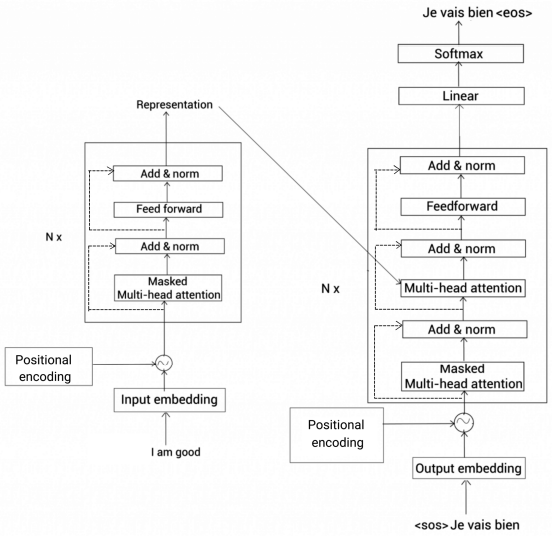

Contrario a lo esperado los transformer no son estos vehículos que se transforman en robots... Los transformers son arquitecturas basadas en encoder-decoder y tuvieron su principal enfoque en solucionar la tarea de traducción de textos, esto ya que tenemos secuencias de palabras que estamos interesados en transformarlas a un determinado lenguaje.

De la figura superior, podemos notar que esta GRAN estructura está conformada por dos partes principalmente que cumplen las siguientes funciones:

- **Encoder** (estructura de la izquierda): Esta parte recibe los tokens y los transforma en una secuencia de embedding.
- **Decoder** (estructura de la derecha): Utiliza los hidden state del encoder para generar de forma iterativa una secuencia de tokens.

Por otro lado, algunos de los puntos que caracterizas a esta arquitectura son los siguientes puntos:

- Las entradas son tokenizadas y transformadas en embeddings, luego producto que la capa de atención no identifica la posición de las palabras, se combina la entrada con una capa de embeddings posicionales que contiene información posicional de los tokens.
- Los encoder son compuestos por capas apiladas de encoder, esto es similar a lo que se hace en computer vision donde se apilan varias CNN para obtener mejores representaciones de las imagenes. Este principio se repite tanto para los encoders como decoders.
- Las salidas de los encoder alimentan al decoder para predecir secuencialmente los tokens de palabras siguientes.

### **Mas vale tomar Attention**

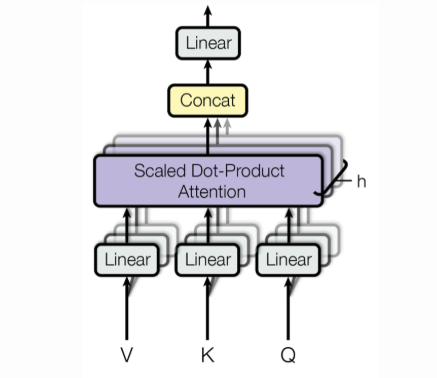

Una de las partes mas relevantes de este tipo de redes es la fuerte presencia de Multi-Head Attention layers. Pero para ilustrar como funcionan estas capas, revisaremos lo que hace su unidad basica conocida como self-attention, quien permite que una red neuronal asigne un peso de "atención" a cada elemento de una secuencia.

La idea de este mecanismo es que de en vez de usar fixed embedding para cada uno de los token, generemos representaciones que sean la suma ponderada de cada embedding, por lo tanto buscamos modificar los embedding originales generando contextualized embeddings 😯.

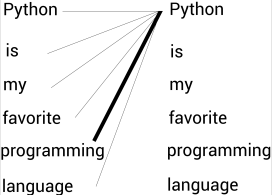

Pero... cuentame un poco mas sobre la **Scaled dot-product attention**, ¿que hace?.

En este bloque de la arquitectura es donde ocurre toda la magia en el ocurre lo siguiente:

1. Proyecta cada uno de los embedding en tres vectores  llamados Query, Value y Key.
2. Se calcula el score de Attention realizando un producto punto entre Q y K. Esto nos entres que tan similares son los tensores unos de otros.
3. Se escala el Attention Score diviendolo por la raiz del largo del tensor Q.
4. Se aplica una softmax al paso anterior y se actualiza el token embedding.

Link al gran paper original ---> [All you need is attention](https://arxiv.org/pdf/1706.03762.pdf).

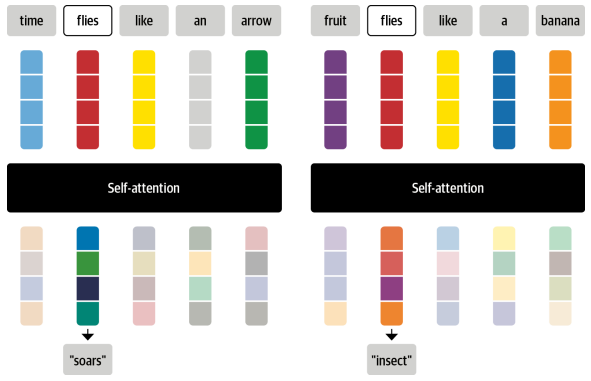

## **¿Qué resuelve BERT? ¿Cómo fue entrenado?**

El primer objetivo de **BERT** es resolver la tarea llamada **masked language modeling**. En este modelo, **las palabras de una frase se borran al azar y se reemplazan por un token especial** ([MASK]) con probabilidad 15%. Luego, se utiliza un Transformer para generar una **predicción para la palabra remplazada** por [MASK] basada en las palabras no enmascaradas que la rodean, tanto a la izquierda como a la derecha.

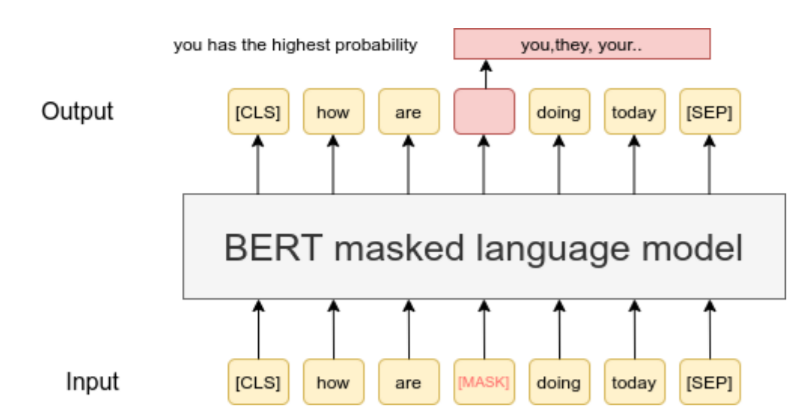

El segundo objetivo de **BERT** es resolver la tarea de **Next Sentence Prediction**. El modelo recibe **dos oraciones como entrada** y aprende a predecir **si la segunda oración del par es la oración que siguiente del documento original**. Durante el entrenamiento, el 50% de los inputs son un par en el que la segunda frase es la frase siguiente en el documento original, mientras que en el otro 50% se elige una frase aleatoria del corpus como segunda frase.

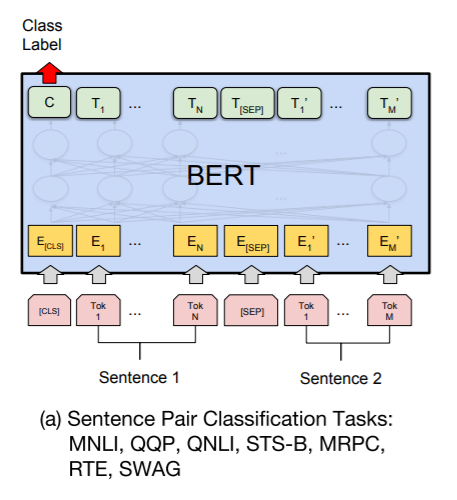


Pueden leer un poco más [acá](https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270).



## **¿Oye, pero esto suena un poco magico, tienes algunos ejemplos?**

Hay bastantes librerías que tienen el modelo **pre-entrenado** a disposición, partiendo por el [GitHub de BERT](https://github.com/google-research/bert) implementado en TensorFlow. Como nosotros sabemos utilizar **pytorch**, utilizaremos la [version de HuggingFace](https://huggingface.co/transformers/) la cual es respaldada por el github de Google y la elogian: "which is compatible with our pre-trained checkpoints and is able to reproduce our results". Esta version se importa con la libreria transformers. Otras version disponibles son [sentence-bert](https://github.com/UKPLab/sentence-transformers) o [bert-as-service](https://github.com/hanxiao/bert-as-service).

In [1]:
%%capture
!pip install transformers
!pip install datasets
!pip install bertviz
!pip install torch

In [2]:
from transformers import BertTokenizer, BertModel
import torch

Veamos el primer ejemplo que entrega la documentación

In [3]:
# Si estamos utilizando google colab, no se preocupen por las descargas, ya que las hace el servidor de colab y no les gasta ancho de banda a uds
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') # Cargamos el tokenizador
model = BertModel.from_pretrained('bert-base-uncased') # Cargamos el modelo pre-entrenado

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [4]:
print(tokenizer.vocab_size)
print(tokenizer.model_max_length)

30522
512


Aquí es sumamente importante que para **TODO** modelo pre-entrenado utilicen el mismo tokenizador con el que fue entrenado el modelo. Cambiar el tokenizador es básicamente cambiar el vocabulario que está entrando al modelo (por la forma que ya están mapeadas las palabras). Por esto, si llegan a elegir un tokenizador que no sea de BERT podrían estar diciendo que un "caballo" es un "gato".

In [5]:
from transformers import AutoTokenizer
from bertviz.transformers_neuron_view import BertModel
from bertviz.neuron_view import show

model_ckpt = "bert-base-uncased"
tokenizer_viz = BertTokenizer.from_pretrained('bert-base-uncased')
model_ckpt = BertModel.from_pretrained(model_ckpt)
text = "time flies like an arrow"
show(model_ckpt, "bert", tokenizer_viz, text, display_mode="light", layer=0, head=8)

100%|██████████| 440473133/440473133 [00:22<00:00, 19216666.43B/s]
/usr/local/lib/python3.10/dist-packages/bertviz/transformers_neuron_view/modeling_utils.py:482: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues rela

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Como se pudieron dar cuenta es muy sencillo cargar un modelo pre-entrenado de bert, pero con esto podemos preguntarnos: ¿hay solo un modelo BERT?, la respuesta a esto es no, ya que los genios de Google al entrenar el modelo generaron variantes relacionadas al tamaño de la arquitectura y con variaciones del texto que utilizaron para entrenar. La siguiente tabla resume los modelos:

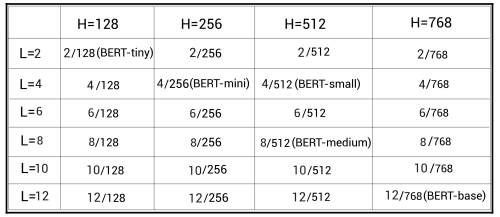

En la tabla, H representa la cantidad de unidades ocultas que poseen las arquitecturas, mientras que L representa el número de capas de encoder que posee el modelo. Con esto, podemos visualizar la existencia 5 tipos de modelos que varían por tamaño, es importante notar con esto que estos diferentes tamaños producirán diferencias en el rendimiento (así que ojo con su elección).

Finalmente, va a ser común que al momento que ustedes carguen los modelos vean un tal `uncased` o `cased`, no asusteis con estom esto simplemente señala lo siguiente:

- `uncased`: Se refiere a un modelo de BERT que considera los tokens en minúscula.
- `cased`: Se refiere a un modelo de BERT que considero los tokens sin modificaciones, o sea no se realiza la transformación a minúsculas.

**OJO 👁️:** La existencia de estos casos no es porqué sí. Para tareas como NER puede ser mejor la utilización de `cased` debido a que hay palabras que pueden cambiar el significad con mayúsculas en ciertos caracteres.

### **Todo muy bonito, pero en sintesís, ¿para que se ocupan estos modelos pre-entrenados?**

Estos modelos pre-entrenados permiten aterrizan a los mortales como nosotros (personas sin GPUs monstruosas) modelos que exigen largos tiempos de entrenamiento y recursos. permitiéndonos generar estructuras que nos permiten fácilmente:

- Extraer features contextualizadas desde el texto.
- Fine-tunear BERT para obtener mejores rendimientos en diferentes tareas de NLP.




### **Obteniendo Embeddings Contextualizados**
Lo primero que vamos a hacer es **transformar una frase en su representación vectorial usando BERT**. Por defecto, la dimensión de la salida es 768, es decir, cada token en mi frase va a ser representado por un vector de 768 elementos.

In [6]:
# Lo primero que hacemos es tokenizar nuestra frase
# 'pt' especifica que queremos vectores de pytorch, 'tf' seria en tensorflow
inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")

# Esto tokeniza la frase como:
# [[CLS], "Hello", ",", "my", "dog", "is", "cute", [SEP]]
# Tenemos 8 tokens, contando el CLS (101) y el SEP (102)
# Output: tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,   102]])
inputs

{'input_ids': tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [7]:
# Luego le pasamos la frase tokenizada al modelo pre-entrenado
outputs = model(**inputs)

# Aqui el doble asterico es una forma de pasar multiples parámetros a una función desde un único diccionario, por ejemplo:
# d = {'a': 1, 'b':2}; model(**d) sería equivalente a pasar cada variable como: model(a=1,b=2)


# El ultimo hidden-state es la transformación en embeddings que nos interesa.
# Para convencerse pueden pensar que es el último paso antes de aplicar una softmax.
last_hidden_states = outputs.last_hidden_state.squeeze(0) # squeeze en la primera dimension ya que es 1

print(inputs['input_ids']) # Tenemos 8 tokens, contando el CLS (101) y el SEP (102)
print(last_hidden_states.shape) # Tenemos 8 vectores de 768 dimensiones
print(last_hidden_states)

tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,   102]])
torch.Size([8, 768])
tensor([[-0.1144,  0.1937,  0.1250,  ..., -0.3827,  0.2107,  0.5407],
        [ 0.5308,  0.3207,  0.3665,  ..., -0.0036,  0.7579,  0.0388],
        [-0.4877,  0.8849,  0.4256,  ..., -0.6976,  0.4458,  0.1231],
        ...,
        [-0.7003, -0.1815,  0.3297,  ..., -0.4838,  0.0680,  0.8901],
        [-1.0355, -0.2567, -0.0317,  ...,  0.3197,  0.3999,  0.1795],
        [ 0.6080,  0.2610, -0.3131,  ...,  0.0311, -0.6283, -0.1994]],
       grad_fn=<SqueezeBackward1>)


### **Obtener representación de una oración desde el último hidden-state**

Quizás en vez de trabajar con **Word Embeddings** nos convenga trabajar con **Sentence Embedding**. Podemos pensar en un Sentence Embedding con **la mezcla** de los Words Embedding de mi input. Los autores de BERT usaban el token [CLS] para este propósito, aunque no es muy recomendado, ya que depende del **fine tunning** (veremos esto más adelante). Otra opción, mucho más usada,es tomar el **promedio de todos mis word embeddings**. Hay más formas de pooling (es decir como se mezclan los tokens), por ejemplo, podemos ver las de bert-as-service [acá](https://github.com/hanxiao/bert-as-service#q-what-are-the-available-pooling-strategies).

In [8]:
# Representacion con average
# Recordemos que nuestra frase tokenizada tiene 8 elementos
# y que el primero y el ultimo son tokens especiales: [CLS] y [SEP], por lo que los descartamos.
average = torch.mean(last_hidden_states[1:-1], 0)
print(average.shape)
print(torch.equal(average, average))

torch.Size([768])
True


# **Predecir la frase siguiente con BERT**

Usemos BERT para una de las tareas con las que fue entrenado: **predecir si una frase es la siguiente o no**. Para esto vamos a utilizar BertForNextSentencePrediction.

In [9]:
from transformers import BertForNextSentencePrediction

Utilizamos el tokenizador común de BERT, solo cambiamos el modelo.

In [10]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForNextSentencePrediction.from_pretrained('bert-base-uncased')

Creamos una función que nos dice si tiene sentido o no la oración que continua.

In [11]:
def evaluar_oraciones(primera,segunda):
  encoding = tokenizer(primera, segunda, return_tensors='pt')
  output = model(**encoding, labels=torch.LongTensor([1])) # El label representa cual es la oración
  logits = output.logits.squeeze(0) # Tiene un solo elemento en la dimension 0

  # Notar que logits[0] entrega el score que la oracion si sea la siguiente (que tan True)
  # logits[1] entrega el score de que la oracion no sea la siguiente (que tan False)
  # ambos valores de logits están en el rango (-inf, inf)
  # Se puede aplicar una SoftMax sobre estos resultados para que sean probabilidades
  # Pero no es necesario.

  if logits[0] < logits[1]:
    print("La oración no tiene nada que ver")
  elif logits[0] > logits[1]:
    print("La oración es una continuación")
  else:
    print("No estoy seguro")


Probemos este código con algunos ejemplos

In [12]:
prompt = "In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced."
next_sentence = "The sky is blue due to the shorter wavelength of blue light."
evaluar_oraciones(prompt,next_sentence)

La oración no tiene nada que ver


In [13]:
prompt = "I'm really hungry."
next_sentence = "I'm getting a BigMac."
evaluar_oraciones(prompt,next_sentence)

La oración es una continuación


## BERT como extractor de features

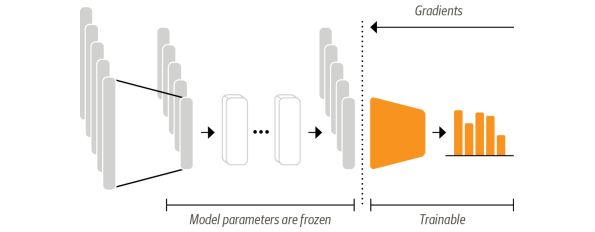

La idea detrás de esta tarea es utilizar una red pre-entrenada de BERT para generar solamente Features, tal cual como usábamos Word2Vec peroo quizás un poquito…. (si un poquito nomas) más complicado por el uso extracto de ciertos tokenizadores y extracción de hidden states.

Para esto comenzaremos cargando el `distilbert-base-uncased`, con el que realizaremos  una tarea de clasificación de sentimientos.

Para este ejemplo nos basamos en un ejercicio del libro `Natural Language
Processing with Transformers`.

In [14]:
from transformers import AutoTokenizer
from transformers import AutoModel
from datasets import load_dataset
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model_distilbert = AutoModel.from_pretrained(model_ckpt).to(device)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Cargado el modelo, usaremos para el entrenamiento un dataset dispuesto por la librería `datasets`, donde el dataset posee un conjunto de textos que están etiquetados con determinados sentimientos.

In [15]:
# Cargamos un dataset que forma parte de la librería datasets
emotions = load_dataset("emotion")

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [16]:
# Revisamos algunos ejemplos para ver que tiene
emotions['train']['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

Paso siguiente, como queremos generar features utilizando BERT, crearemos unas funciones que nos permiten extraer los hidden state del modelo de BERT. Finalmente generaremos un dataset en el formato ultra conocido de `DataSet` para entrenar un modelito pequeño.

In [17]:
def tokenize(batch):
  # Por cada batch vamos a obtener el texto, tokenizarlo y aplicar padding
  return tokenizer(batch["text"], padding=True, truncation=True)

def extract_hidden_states(batch):
 # Vamos a extraer los hidden states desde BERT, para esto pasamos el modelo
 # dispositivo
 inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
 # Extraimos solamente la last hidden state
 with torch.no_grad():
   last_hidden_state = model_distilbert(**inputs).last_hidden_state
 # representaciones vectoriales que tanto queriamos :D
 return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

# Aplicamos funciones creadas
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [18]:
# Revisamos que tiene el dataset creado
emotions_hidden['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
    num_rows: 16000
})

In [19]:
emotions_hidden['train']['text'][0]

'i didnt feel humiliated'

Generamos las estructuras "clasicas" para entrenar un  modelo de regresión logistica mas tarde.

In [20]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

Pregunta.... ¿cómo se ven las features?... Antes de entrenar y predecir el desempeño del modelo vamos a ver representaciones visuales de las features, para ver si estas tienen una tendencia a generar patrones en los datos. Para esto utilizamos un reductor de dimensionalidad llamado TSNE (ya que más de 3d es imposible ver para nosotros) y... probamos!

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import pandas as pd

# Escalamos los datos
X_scaled = MinMaxScaler().fit_transform(X_train)
# Reducimos la dimensionalidad con TSNE de 768 a 2
mapper = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_scaled)

# Creamos dataframe para el plot
df_emb = pd.DataFrame(mapper, columns=["X", "Y"])
df_emb["label"] = y_train

In [22]:
df_emb.head()

,X,Y,label
0,22.383314,51.997921,0
1,-5.471296,-35.486183,0
2,-1.444984,56.970787,3
3,8.587064,-10.588789,2
4,16.606361,-22.272957,3


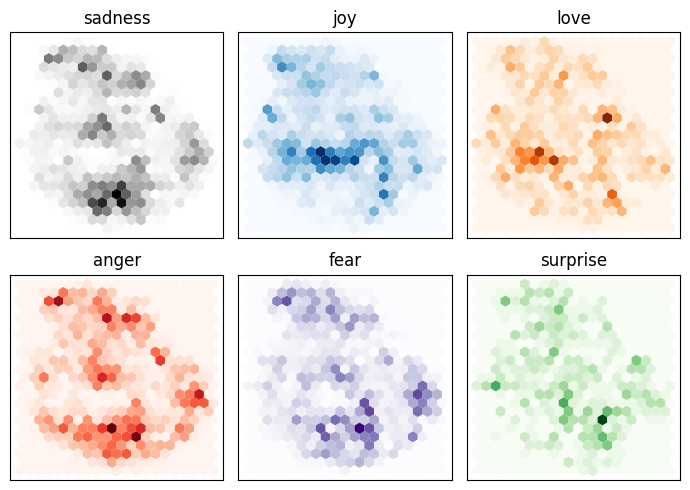

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
 df_emb_sub = df_emb.query(f"label == {i}")
 axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
 gridsize=20, linewidths=(0,))
 axes[i].set_title(label)
 axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

Como podemos ver, las palabras tienden a agruparse de diferente manera según los sentimientos, esto resulta muy interesante, ya que potencialmente un clasificador podrá identificar estos patrones 😯.

Probemos con un clasificador ultra basico, la muy bien conocida Regresión logistica

In [24]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=5000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.635

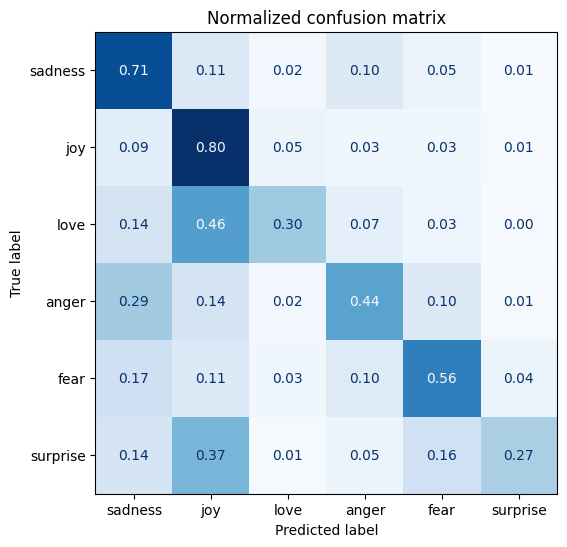

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
 cm = confusion_matrix(y_true, y_preds, normalize="true")
 fig, ax = plt.subplots(figsize=(6, 6))
 disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
 disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
 plt.title("Normalized confusion matrix")
 plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

De los resultados, resulta interesante que a través de las features generadas logremos un modelo que logra discernir ante varias labels utilizando solamente un clasificador tan básico como logistic regression.

## **BETO y el DCC**

https://github.com/dccuchile/beto

https://users.dcc.uchile.cl/~jperez/papers/pml4dc2020.pdf

# Para Cerrar

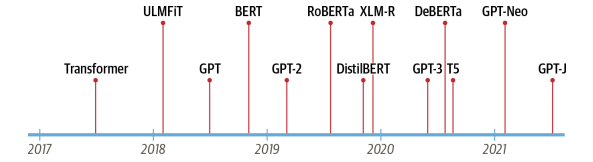